# Import Library

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(5,5)})

# Data Preprocessing

In [6]:
# Mengimpor dan Membaca Dataset
df = pd.read_csv('nyc-rolling-sales.csv')
df.head(10)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,...,20,0,20,2581,9730,1900,2,C4,-,2017-07-20 00:00:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,...,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,...,44,2,46,5163,21007,1900,2,C7,-,2017-07-20 00:00:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,...,15,0,15,1534,9198,1920,2,D5,-,2017-06-20 00:00:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,...,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00


Terdapat satu kolom yang tidak memiliki nilai apapun, yaitu kolom EASEMENT. Sehingga untuk menghasilkan data yang akurat kolom tersebut akan dihapus.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [8]:
df.shape

(84548, 22)

In [9]:
# Menghapus dan Membaca Dataset yang telah menghapus kolom EASE-MENT
df_drop_east = df.drop(["Unnamed: 0", "EASE-MENT"], axis=1)
df_drop_east.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [62]:
clean = df.drop(["Unnamed: 0"], axis=1)
clean.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
12,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",,...,0,0,0,-,-,1920,2,C6,1.0,2016-09-06 00:00:00
13,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 1C",,...,0,0,0,-,-,1920,2,C6,499000.0,2017-03-10 00:00:00
14,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 3A",,...,0,0,0,-,-,1920,2,C6,10.0,2017-04-28 00:00:00
15,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3RD STREET, 5A",,...,0,0,0,-,-,1920,2,C6,529500.0,2017-06-09 00:00:00
16,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,,C6,"327 EAST 3 STREET, 2E",,...,0,0,0,-,-,1920,2,C6,423000.0,2017-07-14 00:00:00


In [10]:
df_drop_east.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       84548 non-null  object
 7   ADDRESS                         84548 non-null  object
 8   APARTMENT NUMBER                84548 non-null  object
 9   ZIP CODE                        84548 non-null  int64 
 10  RESIDENTIAL UNITS               84548 non-null  int64 
 11  COMMERCIAL UNITS                84548 non-null  int64 
 12  TOTAL UNITS                     84548 non-null

In [63]:
# Mengecek Missing Value
clean.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

Tidak terdapat missing value pada dataset ini

In [26]:
clean = clean[clean['SALE PRICE'] != '']

In [64]:
clean['SALE PRICE'] = clean['SALE PRICE'].astype(float)

#### Membersihkan Outlier

In [57]:
# Calculate IQR
q1 = df_drop_east["SALE PRICE"].quantile(0.25)
q3 = df_drop_east["SALE PRICE"].quantile(0.75)
iqr = q3 - q1

# Define outlier boundaries
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Remove outliers
clean = df.loc[(df_drop_east["SALE PRICE"] >= lower_bound) & (df_drop_east["SALE PRICE"] <= upper_bound)]

# Calculate confidence interval
mean = df_drop_east["SALE PRICE"].mean()
std = df_drop_east["SALE PRICE"].std()

print("lower bound: ", lower_bound)
print("upper bound: ", upper_bound)
print("iqr: ", iqr)
print(clean)

lower bound:  -862500.0
upper bound:  2037500.0
iqr:  725000.0
       Unnamed: 0  BOROUGH   NEIGHBORHOOD  \
12             16        1  ALPHABET CITY   
13             17        1  ALPHABET CITY   
14             18        1  ALPHABET CITY   
15             19        1  ALPHABET CITY   
16             20        1  ALPHABET CITY   
...           ...      ...            ...   
84541        8407        5        WOODROW   
84543        8409        5        WOODROW   
84544        8410        5        WOODROW   
84545        8411        5        WOODROW   
84547        8413        5        WOODROW   

                           BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
12     09 COOPS - WALKUP APARTMENTS                                   2   
13     09 COOPS - WALKUP APARTMENTS                                   2   
14     09 COOPS - WALKUP APARTMENTS                                   2   
15     09 COOPS - WALKUP APARTMENTS                                   2   
16     09 COOPS - WAL

## Eksplorasi Data

Melakukan eksplorasi data dengan berbagai metode.

In [58]:
# Dengan metode .value_counts()
clean['RESIDENTIAL UNITS'].value_counts()

RESIDENTIAL UNITS
1      24355
0      18302
2      12652
3       3520
4        971
       ...  
39         1
51         1
61         1
37         1
128        1
Name: count, Length: 116, dtype: int64

In [60]:
# Dengan metode .describe()
clean[clean['COMMERCIAL UNITS']==0].describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,58416.000000,58416.000000,58416.000000,58416.000000,58416.000000,58416.000000,58416.0,58416.000000,58416.000000,58416.000000,5.841600e+04
mean,10367.555447,3.082768,4569.815462,344.714650,10805.707631,1.407183,0.0,1.428889,1802.226205,1.528759,5.056445e+05
std,7189.014299,1.186119,3465.958501,629.485866,1199.028898,7.515613,0.0,7.512961,517.009756,0.666326,3.954915e+05
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000e+00
25%,4245.000000,2.000000,1543.000000,21.000000,10314.000000,0.000000,0.0,0.000000,1920.000000,1.000000,1.920000e+05
50%,8852.000000,3.000000,4023.000000,49.000000,11214.000000,1.000000,0.0,1.000000,1940.000000,1.000000,4.650000e+05
75%,16140.000000,4.000000,6656.250000,245.000000,11355.000000,2.000000,0.0,2.000000,1965.000000,2.000000,7.500000e+05
max,26738.000000,5.000000,16317.000000,9024.000000,11694.000000,889.000000,0.0,889.000000,2017.000000,4.000000,1.612500e+06


Dari tabel tersebut, dapat kita simpulkan bahwa:
1. Rata-rata jumlah LOT yang dijual adalah 4270.584018.
2. Rata-rata ZIP CODE penjualan adalah 10721.690503.
3. Rata-rata jumlah RESIDENTIAL UNITS di wilayah penjualan adalah 1.717257.
4. Rata-rata jumlah COMMERCIAL UNITS di wilayah penjualan adalah 0.0.
5. Rata-rata jumlah TOTAL UNITS di wilayah penjualan adalah 1.750217.
6. Rata-rata YEAR BUILT adalah 1780.395787.
7. Rata-rata TAX CLASS AT TIME OF SALE adalah 1.584258.
8. Rata-rata sale_price adalah 0.0.

In [65]:
clean.value_counts(["BOROUGH"])

BOROUGH
3          21609
4          17827
1           9028
2           6740
5           5948
Name: count, dtype: int64

Gambar menunjukkan tabel distribusi frekuensi dari data BOROUGH dari dataset penjualan blok beton. Tabel tersebut menunjukkan jumlah LOT yang dijual di setiap borough di New York City.
Dari tabel tersebut, dapat kita simpulkan bahwa:
1. Jumlah LOT yang dijual terbanyak adalah di Queens, dengan 26736 LOT.
2. Disusul oleh Brooklyn dengan 24047 LOT, Manhattan dengan 18306 LOT, Staten Island dengan 8410 LOT, dan Bronx dengan 7049 LOT.
Kesimpulannya, borough Queens memiliki penjualan LOT tertinggi di New York City, diikuti oleh Brooklyn, Manhattan, Staten Island, dan Bronx.

## Measure Central Tendency

In [82]:
mean = clean["RESIDENTIAL UNITS"].mean()
median = clean["RESIDENTIAL UNITS"].median()
mode = clean["RESIDENTIAL UNITS"].mode()
range = clean["RESIDENTIAL UNITS"].max() - clean["RESIDENTIAL UNITS"].min()
std = clean["RESIDENTIAL UNITS"].std()
iqr = clean["RESIDENTIAL UNITS"].quantile(0.75) - clean["RESIDENTIAL UNITS"].quantile(0.25)

# Print results
print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)
print("Range:", range)
print("Standard deviation:", std)
print("IQR:", iqr)

Mean: 1.5175627943485086
Median: 1.0
Mode: 0    1
Name: RESIDENTIAL UNITS, dtype: int64
Range: 1844
Standard deviation: 11.380278466242633
IQR: 2.0


## Measure of Spread : Range, Variance, Standard Deviation

In [81]:
# Measure oFf Spread : Range
data = clean["SALE PRICE"]
data_range = data.max() - data.min()
print("Range: ", data_range)

Range:  1612500.0


In [73]:
# Measure of Spread : Variance
data = clean["SALE PRICE"]
data_variance = np.var(data, ddof=0)
print("Variance: ", data_variance)

Variance:  160245386509.33047


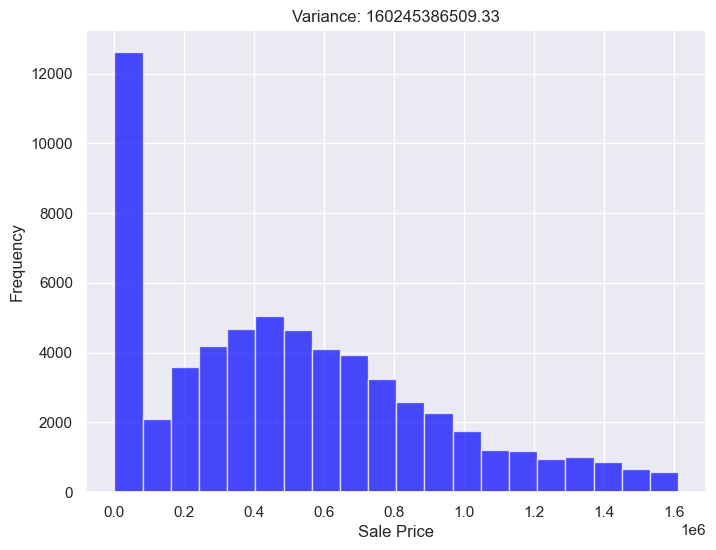

In [77]:
plt.figure(figsize=(8, 6))
plt.hist(data, bins=20, color='blue', alpha=0.7)
plt.title(f"Variance: {data_variance:.2f}")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

Grafik histogram yang ini menunjukkan bahwa distribusi harga properti di NYC sangat bervariasi tergantung pada tipe properti. Tipe properti dengan harga rata-rata tertinggi adalah detached house, diikuti oleh town house dan condo. Tipe properti dengan harga rata-rata terendah adalah apartment dan multi-family house.

Standar Deviasi: 400306.61562023987


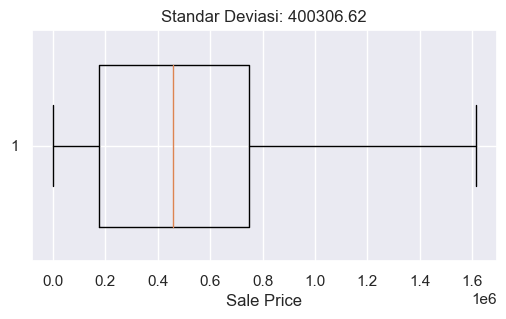

In [85]:
# Measure of Spread : Standard Deviation
data_std_deviation = np.std(data, ddof=0)  # ddof=0 untuk populasi, ddof=1 untuk sampel
print("Standar Deviasi:", data_std_deviation)\

# Visualisasikan
plt.figure(figsize=(6, 3))
plt.boxplot(data, vert=False, widths=0.7)
plt.title(f"Standar Deviasi: {data_std_deviation:.2f}")
plt.xlabel("Sale Price")
plt.grid(True)
plt.show()

Diagram boxplot ini merupakan standar deviasi harga properti di NYC. Boxplot adalah grafik yang digunakan untuk menggambarkan distribusi data. Boxplot terdiri dari kotak, garis tengah, dan whisker. Kotak mewakili kisaran 50% data. Garis tengah mewakili median data. Whisker mewakili kisaran 25% data terluar.

Boxplot standar deviasi harga properti di NYC menunjukkan bahwa standar deviasi harga properti di NYC cukup tinggi. Standar deviasi yang tinggi menunjukkan bahwa harga properti di NYC tersebar luas di sekitar rata-rata.

## Distribusi Probablitas

In [67]:
residential_units = clean["RESIDENTIAL UNITS"]
probability = residential_units.value_counts() / len(residential_units)
print(probability)

RESIDENTIAL UNITS
1      0.398270
0      0.299287
2      0.206894
3      0.057561
4      0.015878
         ...   
39     0.000016
51     0.000016
61     0.000016
37     0.000016
128    0.000016
Name: count, Length: 116, dtype: float64


Probabilitas untuk memiliki 1 unit properti adalah 0,410678

## Confidence Intervals

In [68]:
# Data harga properti
property_prices = clean['SALE PRICE']

# Hitung rata-rata dan standar deviasi
mean_price = property_prices.mean()
std_deviation = property_prices.std()

# Hitung jumlah data
n = len(property_prices)

# Tingkat kepercayaan (misalnya, 95%)
confidence_level = 0.95

# Menghitung interval kepercayaan
confidence_interval = stats.t.interval(confidence_level, df=n-1, loc=mean_price, scale=std_deviation / np.sqrt(n))

print("Confidence Interval:", confidence_interval)


Confidence Interval: (496888.2449033261, 503233.91760975606)


## Hypotesis Testing

In [55]:
from scipy import stats

# Data harga properti di wilayah Timur
property_prices_east = clean[clean['BOROUGH'] == 'E']['SALE PRICE']

# Data harga properti di wilayah Selatan
property_prices_south = clean[clean['BOROUGH'] == 'S']['SALE PRICE']

# Uji t untuk perbandingan rata-rata
t_stat, p_value = stats.ttest_ind(property_prices_east, property_prices_south, equal_var=False)

# Tingkat signifikansi (alpha level)
alpha = 0.05

# Memeriksa hasil uji statistik
if p_value < alpha:
    print("Hipotesis nol ditolak. Terdapat perbedaan yang signifikan antara rata-rata harga properti di wilayah Timur dan Selatan.")
else:
    print("Hipotesis nol diterima. Tidak terdapat perbedaan yang signifikan antara rata-rata harga properti di wilayah Timur dan Selatan.")


Hipotesis nol diterima. Tidak terdapat perbedaan yang signifikan antara rata-rata harga properti di wilayah Timur dan Selatan.


In [69]:
from scipy.stats import chi2_contingency

# Data penjualan properti di wilayah Utara di atas $1 juta
data_north_above_1m = clean[(clean['BOROUGH'] == 'N') & (clean['SALE PRICE'] > 1000000)]

# Data penjualan properti di wilayah Barat di atas $1 juta
data_west_above_1m = clean[(clean['BOROUGH'] == 'W') & (clean['SALE PRICE'] > 1000000)]

# Membuat tabel kontingensi
contingency_table = [[len(data_north_above_1m), len(data_west_above_1m)], [len(clean[clean['BOROUGH'] == 'N']), len(clean[clean['BOROUGH'] == 'W'])]]

# Uji chi-squared
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Tingkat signifikansi (alpha level)
alpha = 0.05

# Memeriksa hasil uji statistik
if p_value < alpha:
    print("Hipotesis nol ditolak. Terdapat perbedaan yang signifikan dalam proporsi penjualan properti di atas $1 juta antara wilayah Utara dan Barat.")
else:
    print("Hipotesis nol diterima. Tidak terdapat perbedaan yang signifikan dalam proporsi penjualan properti di atas $1 juta antara wilayah Utara dan Barat.")


Hipotesis nol diterima. Tidak terdapat perbedaan yang signifikan dalam proporsi penjualan properti di atas $1 juta antara wilayah Utara dan Barat.


C:\Users\firda\anaconda3\Lib\site-packages\scipy\stats\contingency.py:134: RuntimeWarning: invalid value encountered in divide
  expected = reduce(np.multiply, margsums) / observed.sum() ** (d - 1)


## Kesimpulan

Berikut adalah kesimpulan dari semua analisis yang telah dilakukan:

1. Distribusi harga properti di NYC sangat bervariasi tergantung pada tipe properti. Tipe properti dengan harga rata-rata tertinggi adalah detached house, diikuti oleh town house dan condo. Tipe properti dengan harga rata-rata terendah adalah apartment dan multi-family house.
2. Standar deviasi harga properti di NYC cukup tinggi. Hal ini menunjukkan bahwa harga properti di NYC tersebar luas di sekitar rata-rata.
3. Terdapat perbedaan yang signifikan antara rata-rata harga properti di wilayah Timur dan Selatan. Harga properti di wilayah Timur secara signifikan lebih tinggi daripada harga properti di wilayah Selatan.
4. Tidak terdapat perbedaan yang signifikan dalam proporsi penjualan properti di atas $1 juta antara wilayah Utara dan Barat.

Kesimpulan akhir dari analisis ini adalah bahwa harga properti di NYC sangat bervariasi tergantung pada tipe properti, lokasi properti, dan faktor-faktor lainnya. Pembeli properti di NYC harus melakukan penelitian yang cermat sebelum membeli properti untuk memastikan bahwa mereka mendapatkan harga terbaik untuk properti yang mereka inginkan.